# Predicting Accident Hotspots

Figure 1 below reveals the most accident prone areas Great Britain: the cities of South East and West Midlands regions, also areas around Middlesbrough, Glasgow and Edinburgh.

Figure 2 shows that the number of accidents has been declining across the years all over the country.

### Importing Python Libraries and the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import geopandas
from shapely.geometry import Point
%matplotlib inline

#Accidents dataset
acc0514 = pd.read_csv('data/Acc0514.csv', parse_dates=['Date'])
acc15 = pd.read_csv('data/Acc15.csv', parse_dates=['Date'])
acc16 = pd.read_csv('data/Acc16.csv', parse_dates=['Date'])
acc17 = pd.read_csv('data/Acc17.csv', parse_dates=['Date'])

frames = [acc0514, acc15, acc16, acc17]
acc = pd.concat(frames)

### A bit of data cleaning and feature engineering

In [3]:
acc = acc.dropna(subset=['Latitude', 'Longitude']) # Dropping datapoints with missing latitude and longitute 
acc['year'] = pd.DatetimeIndex(acc['Date']).year # Creating a feature for the year of the accident
acc['geometry'] = acc.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1) #Creating geometry feature
geo_acc = geopandas.GeoDataFrame(acc, geometry='geometry')
geo_acc.crs = {'init': 'epsg:4326'}

### Fig.1. The Overall Accident Hotspots (2005 - 2017)

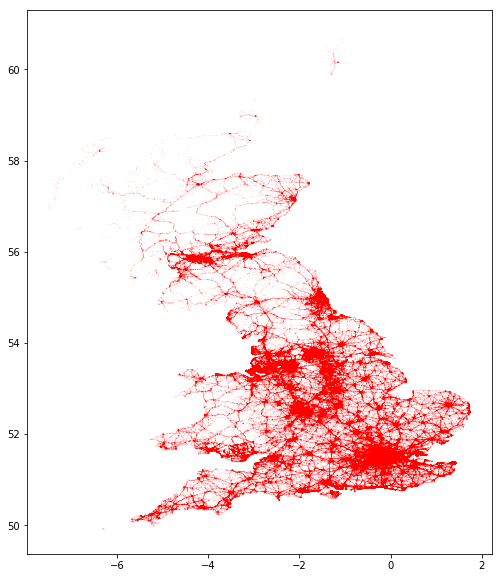

In [6]:
geo_acc.plot(figsize=(16,10), marker="o", color="red", markersize=0.5, edgecolor="none", alpha=0.1)
plt.show()

### Fig.2. The Evolution of Accident Hotspots Between 2005-2017

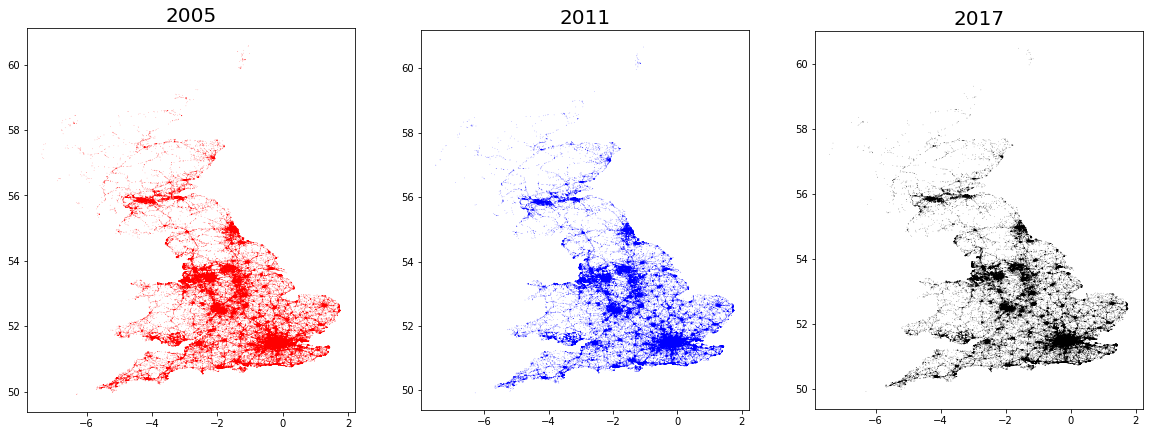

In [4]:
fig, (ax1, ax2, ax3)=plt.subplots(1,3, figsize=(20,10))
geo_acc[geo_acc['year']==2005].plot(ax=ax1, marker="o", color="red", markersize=0.5, edgecolor="none", alpha=0.4)
geo_acc[geo_acc['year']==2011].plot(ax=ax2, marker="o", color="blue", markersize=0.5, edgecolor="none", alpha=0.4)
geo_acc[geo_acc['year']==2017].plot(ax=ax3, marker="o", color="black", markersize=0.5, edgecolor="none", alpha=0.4)
ax1.set_title('2005', fontsize=20) 
ax2.set_title('2011', fontsize=20) 
ax3.set_title('2017', fontsize=20) 
plt.show()